#### Importing libraries

In [1]:
import numpy as np
import statistics
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from mlxtend.plotting import plot_decision_regions
from pandas import DataFrame
import sklearn.datasets as skdata

#### Implementing the $k$-NN (manual)

Classes: ['blue', 'red', 'red']
Classification: red


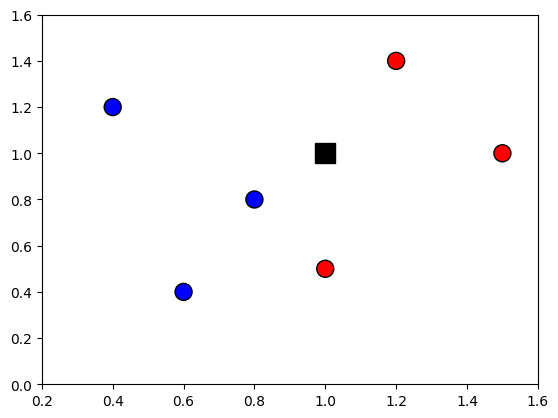

In [2]:
def knn(x_train, y_train, x_test, k):
    distances = []  # List to store distances
    x1 = x_test  # Element to be classified
    for x2 in x_train:  # Calculate the distance between the test observation and elements in the training set
        dist = distance.euclidean(x1, x2)
        distances.append(dist)
    indices = []
    cl = []
    for i in range(0, k):
        ind = np.argmin(distances)  # Find the nearest element in the training set
        # print('distance:', distances[ind],'index:', ind, 'class:', y_train[ind])
        distances[ind] = np.max(distances)  # Exclude the current closest distance
        indices.append(ind)
        cl.append(y_train[ind])  # Store the class
    print("Classes:", cl)
    classification = statistics.mode(cl)  # Determine the most frequent class
    return classification

k = 3  # Number of neighbors
x_train = np.array([[1, 0.5], [0.8, 0.8], [1.2, 1.4], [0.6, 0.4], [0.4, 1.2], [1.5, 1]])
y_train = np.array(['red', 'blue', 'red', 'blue', 'blue', 'red'], dtype='str')
x_test = np.array([1, 1])
# Perform classification
cl = knn(x_train, y_train, x_test, k)
print("Classification:", cl)

# Plot the data
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=150, marker='o', edgecolor='black')
plt.plot(x_test[0], x_test[1], marker='s', markersize=15, color="black")
plt.xlim(0.2, 1.6)
plt.ylim(0, 1.6)

plt.show(True)


The separation region defined by the algorithm forms Voronoi cells, as shown below.

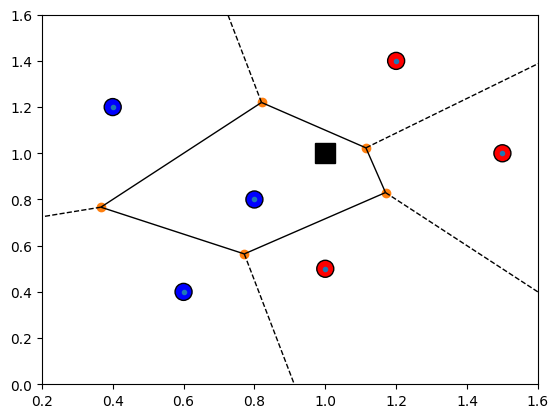

In [3]:
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(x_train)
voronoi_plot_2d(vor)

plt.scatter(x_train[:,0],x_train[:,1],c=y_train, s=150, marker='o', edgecolor='black')
plt.plot(x_test[0],x_test[1], marker='s', markersize=15, color="black")

plt.xlim(0.2,1.6)
plt.ylim(0,1.6)
plt.show()

**Decision Region**  

By selecting two attributes, we can visualize the decision regions created by the algorithm. These regions are defined based on how the algorithm assigns labels to points in the feature space, effectively partitioning it into distinct areas corresponding to different classes.  

The decision boundaries formed by $k$-NN are influenced by the distance metric and the value of \(k\). Each region reflects the areas where points are closer to specific training samples, following the logic of the Voronoi diagram.  

To plot the decision regions, you need to install the `mlxtend` library, which provides tools for creating such visualizations. Installation can be done via the following command:  
```bash
conda install -c conda-forge mlxtend
```  
Visit the official installation guide for more details: [http://rasbt.github.io/mlxtend/installation/](http://rasbt.github.io/mlxtend/installation/).  

For the k-nearest neighbors method, the algorithm calculates the \(k\)-closest points for any given point in the space and assigns the majority class (for classification) or the average value (for regression). As a result, the decision regions may appear non-linear and vary significantly based on the value of \(k\). A smaller \(k\) results in more intricate, detailed regions sensitive to noise, while a larger \(k\) smooths out the boundaries, potentially oversimplifying the model.  

Visualizing these regions helps to understand how the algorithm makes predictions and highlights the influence of hyperparameter selection on the decision boundaries.

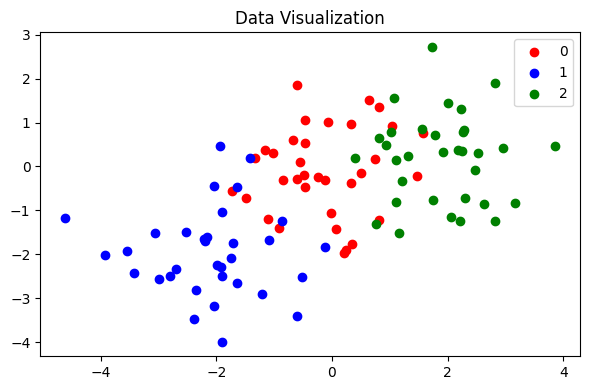

In [4]:
# Generate data in two dimensions
n_samples = 100  # Number of observations
centers = [(0, 0), (-2, -2), (2, 0)]  # Centers of the clusters
X, y = skdata.make_blobs(n_samples=100, n_features=2, cluster_std=1.0, centers=centers, 
                         shuffle=False, random_state=42)

# Create the attribute matrix
d = np.column_stack((X, np.transpose(y)))
data = DataFrame(data=d, columns=['X1', 'X2', 'y'])  # Convert to Pandas DataFrame format
features_names = ['X1', 'X2']
class_labels = np.unique(y)

# Plot the data, coloring according to classes
colors = ['red', 'blue', 'green', 'black']
aux = 0
plt.figure(figsize=(6, 4))
for c in class_labels:
    ind = np.where(y == c)
    plt.scatter(X[ind, 0][0], X[ind, 1][0], color=colors[aux], label=c)
    aux += 1
plt.legend()
plt.title("Data Visualization")
plt.tight_layout()
plt.show()

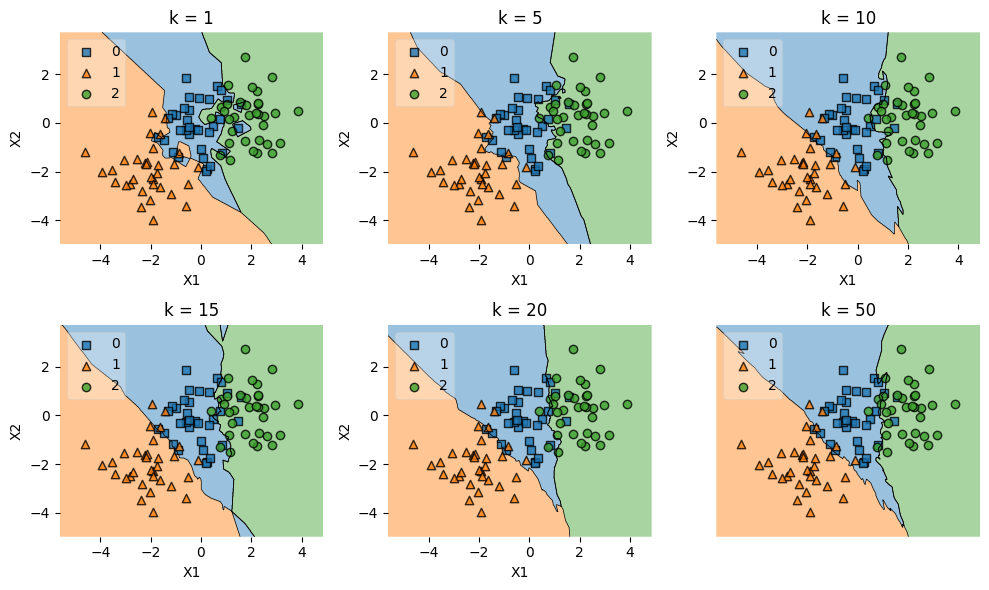

In [5]:
# Plot the decision regions for various values of k in a grid
vk = [1, 5, 10, 15, 20, int(n_samples / 2)]
fig, axes = plt.subplots(2, 3, figsize=(10, 6))  
axes = axes.ravel()  # Flatten the axes for easy iteration

for i, k in enumerate(vk):
    # Train the classifier
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(X, y)
    # Plot decision regions
    plt.sca(axes[i])  
    plot_decision_regions(X, y, clf=model, legend=2)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(f'k = {k}')

axes[-1].axis('off')

plt.tight_layout()
plt.show()


### Choosing the best $k$

To determine the optimal value of $k$ in the $k$-NN algorithm, we use a cross-validation process. This method evaluates the model's performance robustly, avoiding overfitting and providing a reliable estimate of its generalization ability.

In the cross-validation procedure, the dataset is divided into $nkf = 5$ parts, known as folds. The model is trained on four of these parts and tested on the fifth, repeating the process for each fold. This ensures that every partition of the dataset is used for both training and testing, reducing bias and variance in the performance estimate.

The process is repeated for different values of $k$, ranging from 1 to 19. For each value, the average accuracy across all folds is computed, allowing us to compare the model's performance for various configurations of nearest neighbors. The value of $k$ that maximizes this average accuracy is considered the best, as it strikes the ideal balance between complexity and generalization. Small values of $k$ tend to lead to overfitting, while large values may cause underfitting.

The model's performance is visualized using a graph, where accuracy is plotted as a function of $k$. This graph makes it easier to identify the point where the model achieves its best performance, making the selection process more intuitive.

This method ensures that the chosen $k$ is the one that provides the best overall performance for the $k$-NN algorithm, taking into account both the variability of the data and the need to balance the model's ability to capture local patterns and generalize to new data.


k: 1 accuracy: 0.76
k: 2 accuracy: 0.7699999999999999
k: 3 accuracy: 0.8
k: 4 accuracy: 0.8099999999999999
k: 5 accuracy: 0.82
k: 6 accuracy: 0.82
k: 7 accuracy: 0.8400000000000001
k: 8 accuracy: 0.85
k: 9 accuracy: 0.85
k: 10 accuracy: 0.85
k: 11 accuracy: 0.8400000000000001
k: 12 accuracy: 0.85
k: 13 accuracy: 0.8400000000000001
k: 14 accuracy: 0.8400000000000001
k: 15 accuracy: 0.86
k: 16 accuracy: 0.8300000000000001
k: 17 accuracy: 0.8300000000000001
k: 18 accuracy: 0.8300000000000001
k: 19 accuracy: 0.8400000000000001


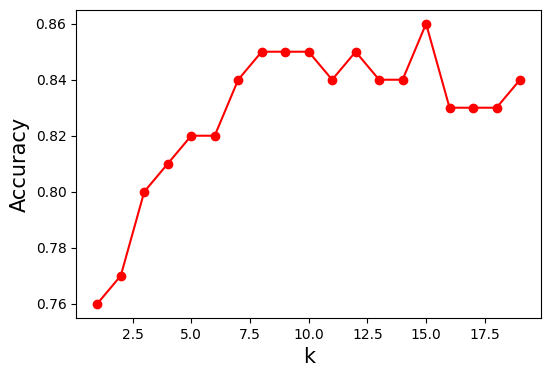

Best k: 15


In [6]:
nkf = 5  # Number of folds
vk = []  # Store k values
vscore = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    # Perform cross-validation
    cv = cross_validate(model, X, y, cv=nkf)
    print('k:', k, 'accuracy:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

plt.figure(figsize=(6, 4))
plt.plot(vk, vscore, '-ro')
plt.xlabel('k', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.show(True)
best_k = np.argmax(vscore) + 1
print('Best k:', best_k)
